# MNIST with MLP
## Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Load data

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train['label']
x_train = train.drop(labels=['label'], axis=1)

In [6]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## One-hot encoding: Transform y to One-hot vector

3 -> [0,0,0,1,0,0,0,0,0,0]

In [8]:
y_train = tf.one_hot(y_train, 10)

In [9]:
y_train

<tf.Tensor: shape=(42000, 10), dtype=float32, numpy=
array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [10]:
x_test = test

## Normalization

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Define model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, Softmax, average
import tensorflow.keras as keras

In [13]:
def get_model():

    model = Sequential([
        Dense(50, kernel_initializer='he_normal', input_shape=(784,)),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),

        Dense(50, kernel_initializer='he_normal'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),

        Dense(50, kernel_initializer='he_normal'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),

        Dense(50, kernel_initializer='he_normal'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),

        Dense(10, kernel_initializer='he_normal'),
        Softmax()
    ])
    
    return model

In [14]:
model1 = get_model()
model2 = get_model()
model3 = get_model()

In [15]:
inputs = keras.Input(shape=(784,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = average([y1, y2, y3])

model  = keras.Model(inputs=inputs, outputs=outputs)

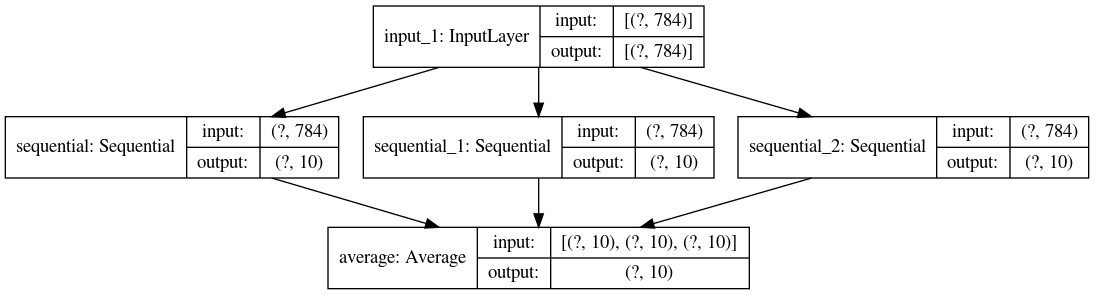

In [16]:
keras.utils.plot_model(model, 'ensemble.png', show_shapes=True)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

## Training

In [18]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50)

Train on 42000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 216us/sample - loss: 0.8225 - categorical_accuracy: 0.8030
Epoch 2/50
42000/42000 [==============================] - 5s 125us/sample - loss: 0.4021 - categorical_accuracy: 0.9045
Epoch 3/50
42000/42000 [==============================] - 5s 128us/sample - loss: 0.3051 - categorical_accuracy: 0.9214
Epoch 4/50
42000/42000 [==============================] - 5s 129us/sample - loss: 0.2675 - categorical_accuracy: 0.9308
Epoch 5/50
42000/42000 [==============================] - 5s 124us/sample - loss: 0.2450 - categorical_accuracy: 0.9379
Epoch 6/50
42000/42000 [==============================] - 5s 125us/sample - loss: 0.2254 - categorical_accuracy: 0.9423
Epoch 7/50
42000/42000 [==============================] - 5s 123us/sample - loss: 0.2126 - categorical_accuracy: 0.9446
Epoch 8/50
42000/42000 [==============================] - 5s 125us/sample - loss: 0.2011 - categorical_accuracy: 0.9482
Epoch 9/50
42000/

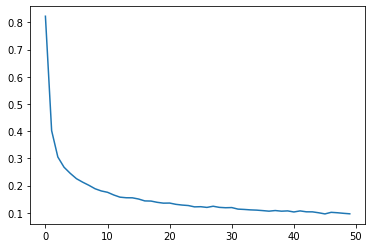

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

## Make prediction

In [20]:
prediction = model.predict(x_test)

In [21]:
prediction.shape

(28000, 10)

In [22]:
prediction[0]

array([7.5046608e-11, 2.6731304e-12, 9.9999988e-01, 5.5951381e-09,
       1.0591177e-10, 1.3021617e-10, 1.0377711e-12, 1.7016978e-07,
       7.2774720e-10, 9.8916338e-14], dtype=float32)

In [23]:
prediction = np.argmax(prediction, axis=1)

In [24]:
prediction[0]

2

## Create csv file for submission

In [25]:
prediction = pd.Series(prediction, name='Label')

id_series = pd.Series(range(1, len(x_test)+1), name='ImageId')

submission = pd.concat([id_series, prediction], axis=1)

In [26]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [27]:
submission.to_csv("mnist_mlp.csv", index=False)